In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
%matplotlib inline

# Cargamos las Propiedades

In [2]:
propertyD = pickle.load(open("../../../datos/Data.p","rb"))

# Vamos a analizar por tipo de propiedad

In [8]:
tipos = propertyD.groupby('property_type').agg(np.size)
tipos.head(10)

,id,created_on,operation,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,expenses,properati_url,description,title,image_thumbnail,latlon,rooms,ambientes,banios,webp
property_type,,,,,,,,,,,,,,,,,,,,,
PH,5565,5565,5565,5565,5565,5565,5565,5565.0,5565,5565.0,...,5565.0,5565,5565,5565,5565,5565,5565.0,5565.0,5565.0,5565
apartment,54367,54367,54367,54367,54367,54367,54367,54367.0,54367,54367.0,...,54367.0,54367,54367,54367,54367,54367,54367.0,54367.0,54367.0,54367
house,30457,30457,30457,30457,30457,30457,30457,30457.0,30457,30457.0,...,30457.0,30457,30457,30457,30457,30457,30457.0,30457.0,30457.0,30457
store,3254,3254,3254,3254,3254,3254,3254,3254.0,3254,3254.0,...,3254.0,3254,3254,3254,3254,3254,3254.0,3254.0,3254.0,3254


In [86]:
propiedades = propertyD[['id','created_on','price_aprox_usd','property_type']]

# Vamos a analizar las casas

In [87]:
propiedades = propiedades[propiedades['property_type'] == 'house']
propiedades.head(3)

,id,created_on,price_aprox_usd,property_type
0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,2012-09-19,120000.0,house
1,a205c53378e7879cf7519659317fb410c060d20e,2012-10-22,220000.0,house
2,9446052c949050359fb08b9f1ba83ba2eaa20c99,2012-12-08,185000.0,house


In [88]:
#Le agrego una columna que es el año
propiedades['year'] = propiedades['created_on']
propiedades['year'] = propiedades['year'].apply(lambda x: int(x[0:4]))

#Le agrego una columna que es el mes
propiedades['month'] = propiedades['created_on']
propiedades['month'] = propiedades['month'].apply(lambda x: int(x[5:7]))

In [89]:
prop2013 = propiedades[ propiedades['year'] == 2013 ]
prop2014 = propiedades[ propiedades['year'] == 2014 ]
prop2015 = propiedades[ propiedades['year'] == 2015 ]
prop2016 = propiedades[ propiedades['year'] == 2016 ]
prop2017 = propiedades[ propiedades['year'] == 2017 ]

In [90]:
pro2013 = prop2013[['month','price_aprox_usd']]
pro2013 = pro2013.groupby('month').agg(np.mean)
pro2013 = pro2013.reset_index()

pro2014 = prop2014[['month','price_aprox_usd']]
pro2014 = pro2014.groupby('month').agg(np.mean)
pro2014 = pro2014.reset_index()

pro2015 = prop2015[['month','price_aprox_usd']]
pro2015 = pro2015.groupby('month').agg(np.mean)
pro2015 = pro2015.reset_index()

pro2016 = prop2016[['month','price_aprox_usd']]
pro2016 = pro2016.groupby('month').agg(np.mean)
pro2016 = pro2016.reset_index()

pro2017 = prop2017[['month','price_aprox_usd']]
pro2017 = pro2017.groupby('month').agg(np.mean)
pro2017 = pro2017.reset_index()

In [93]:
l=[1,2,3,4,5,6,7,8,9,10,11,12]
a = pro2013['price_aprox_usd']
uno = pd.Series([0,0,0,0,a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7]])

In [94]:
pro2013 = pd.DataFrame({'meses':l,'precio':uno})
pro2013

,meses,precio
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,201424.137931
5,6,310000.000000
6,7,187500.000000
7,8,145714.285714
8,9,169000.000000
9,10,282500.000000


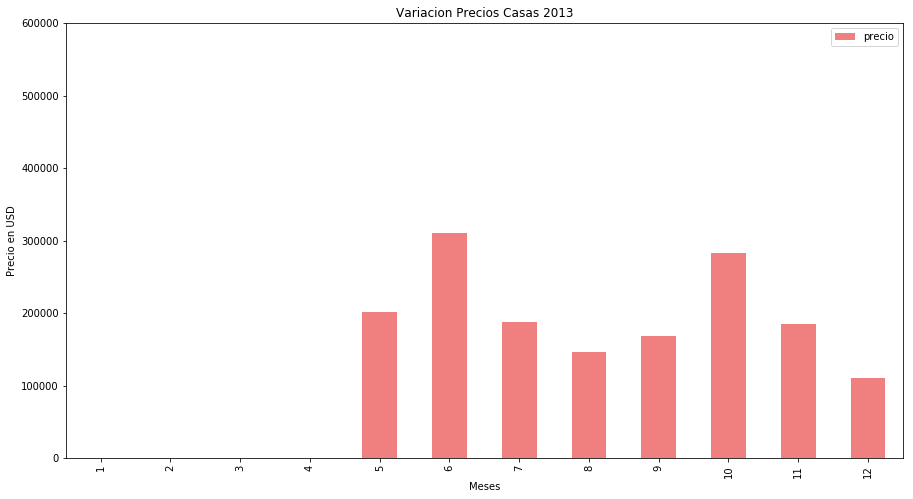

In [96]:
ax = pro2013.reset_index().plot(kind='bar',figsize=(15,8), x='meses',y='precio',\
                  title = 'Variacion Precios Casas 2013',linewidth=2,\
                  color='lightcoral',xticks=l)
ax.set_ylabel('Precio en USD')
ax.set_xlabel('Meses')
ax.set_ylim([0, 600000])
plt.show()

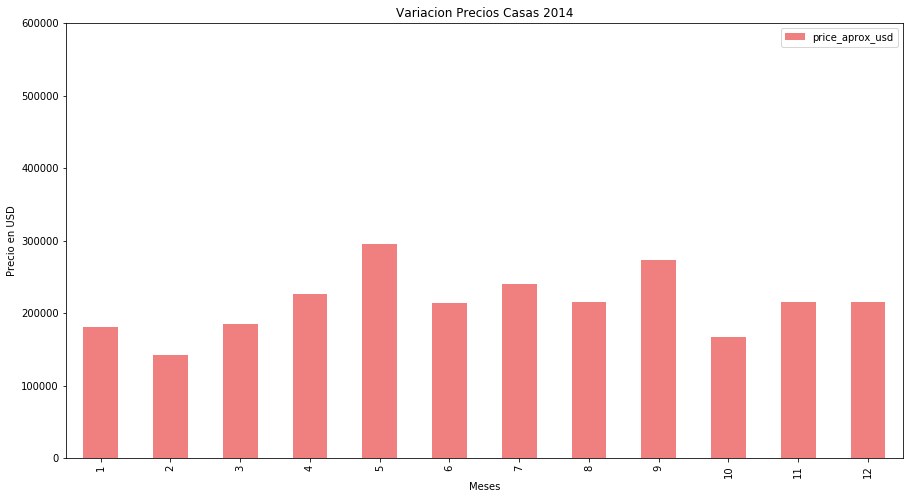

In [47]:
ax = pro2014.reset_index().plot(kind='bar',figsize=(15,8), x='month',y='price_aprox_usd',\
                  title = 'Variacion Precios Casas 2014',linewidth=2,\
                  color='lightcoral')
ax.set_ylabel('Precio en USD')
ax.set_xlabel('Meses')
ax.set_ylim([0, 600000])
plt.show()

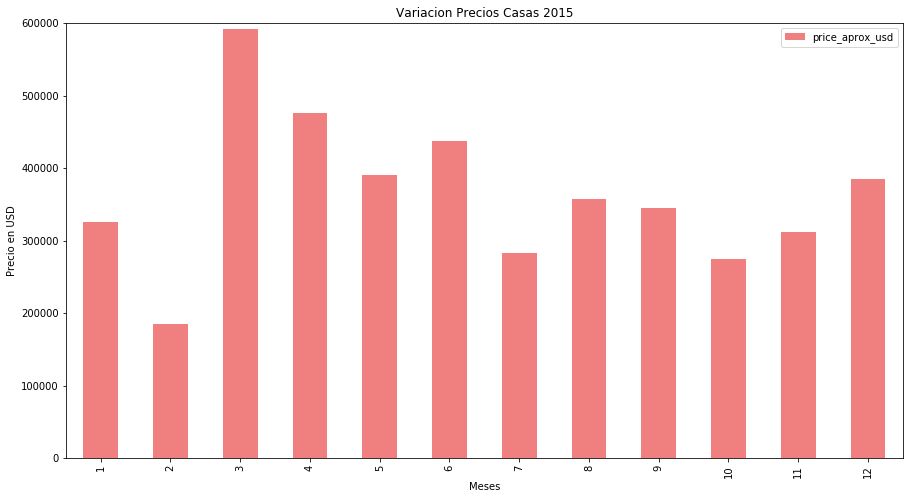

In [48]:
ax = pro2015.reset_index().plot(kind='bar',figsize=(15,8), x='month',y='price_aprox_usd',\
                  title = 'Variacion Precios Casas 2015',linewidth=2,\
                  color='lightcoral')
ax.set_ylabel('Precio en USD')
ax.set_xlabel('Meses')
ax.set_ylim([0, 600000])
plt.show()

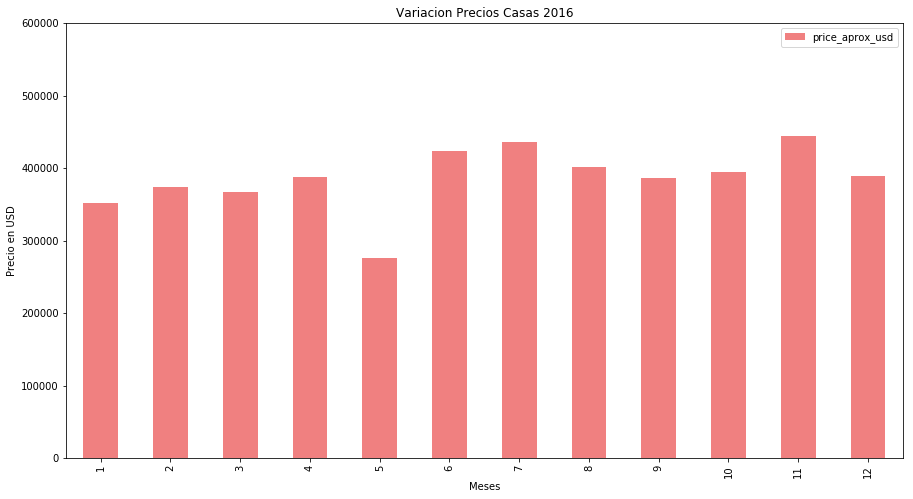

In [50]:
ax = pro2016.reset_index().plot(kind='bar',figsize=(15,8), x='month',y='price_aprox_usd',\
                  title = 'Variacion Precios Casas 2016',linewidth=2,\
                  color='lightcoral')
ax.set_ylabel('Precio en USD')
ax.set_xlabel('Meses')
ax.set_ylim([0, 600000])
plt.show()

In [97]:
b = pro2017['price_aprox_usd']
dos = pd.Series([b[0],b[1],b[2],b[3],b[4],b[5],b[6],b[7],0,0,0,0])

In [98]:
pro2017 = pd.DataFrame({'meses':l,'precio':dos})
pro2017

,meses,precio
0,1,381505.969110
1,2,440079.555029
2,3,421812.576544
3,4,374893.754793
4,5,353015.478132
5,6,378450.619665
6,7,377055.595609
7,8,306709.677419
8,9,0.000000
9,10,0.000000


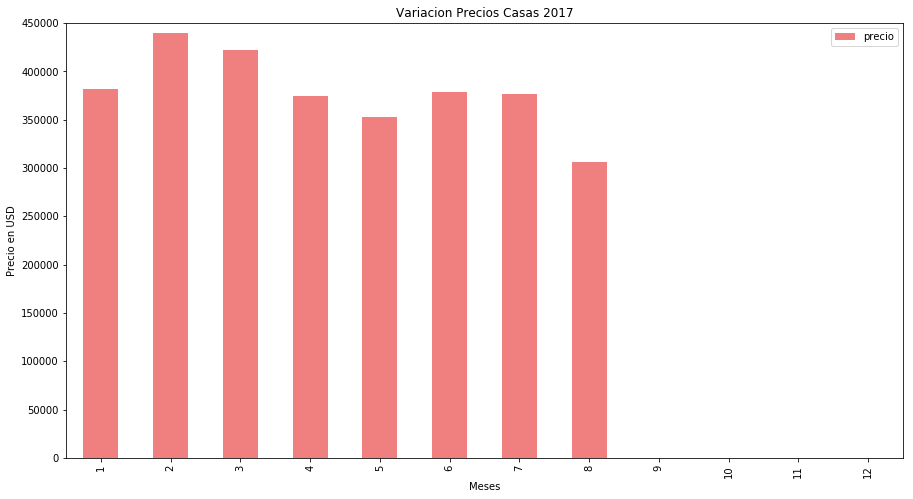

In [100]:
ax = pro2017.reset_index().plot(kind='bar',figsize=(15,8), x='meses',y='precio',\
                  title = 'Variacion Precios Casas 2017',linewidth=2,\
                  color='lightcoral')
ax.set_ylabel('Precio en USD')
ax.set_xlabel('Meses')
ax.set_ylim([0, 450000])
plt.show()